In [45]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [46]:
#Load data
df = pd.read_csv("book.csv",encoding='latin1',index_col=0)
df

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [47]:
#Reaname the columns

df.rename(columns = {'User.ID': 'UserID',
          'Book.Title': 'BookTitle',
           'Book.Rating':'BookRating'}, inplace=True)
df

,UserID,BookTitle,BookRating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


# EDA

In [48]:
#Data description

df.describe()

,UserID,BookRating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [49]:
# checking unique userID and Book ratings

In [50]:
df['UserID'].nunique()

2182

In [51]:
df['BookRating'].nunique()

10

In [52]:
df['BookTitle'].nunique()

9659

In [53]:
# To print number of duplicate values
df['UserID'].duplicated().sum()

7818

In [54]:
df[df['UserID'].duplicated()]

,UserID,BookTitle,BookRating
3,276729,Decision in Normandy,6
9,276747,Under the Black Flag: The Romance and the Real...,9
10,276747,Where You'll Find Me: And Other Stories,8
11,276747,Nights Below Station Street,7
12,276747,Hitler's Secret Bankers: The Myth of Swiss Neu...,7
...,...,...,...
9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


# Data visualization

<AxesSubplot:xlabel='BookRating', ylabel='count'>

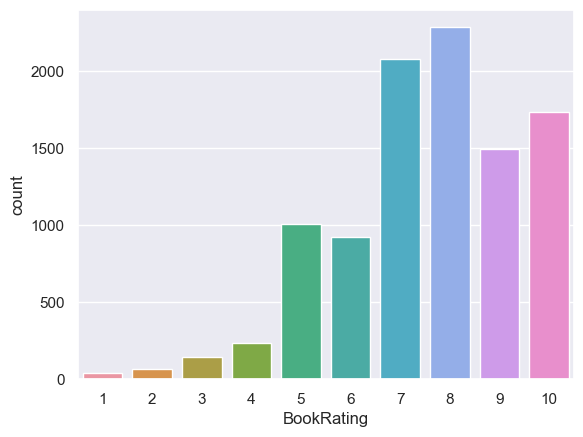

In [55]:
#Countplot
sns.countplot(df['BookRating'])

<AxesSubplot:xlabel='BookRating', ylabel='Count'>

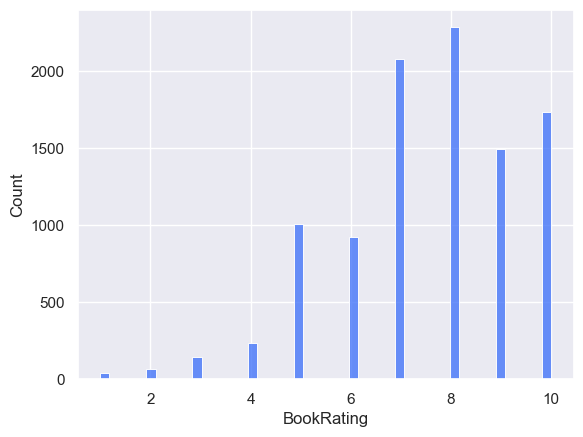

In [56]:
sns.histplot(data=df['BookRating'])

<AxesSubplot:xlabel='BookRating'>

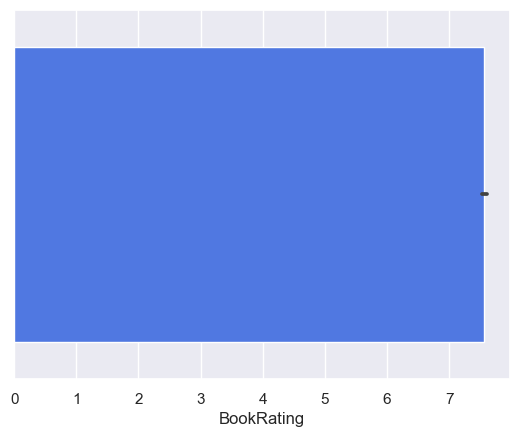

In [57]:
sns.barplot(x=df['BookRating'], data=df)

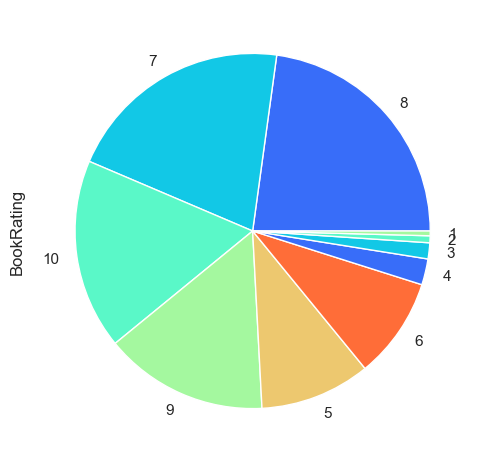

In [58]:
df['BookRating'].value_counts().plot(kind='pie')
plt.tight_layout()

# Model building

User to user based data

In [60]:
df.drop_duplicates(subset=['UserID','BookTitle'],inplace=True)

In [61]:
pivot = pd.pivot(data=df, index='UserID', columns='BookTitle', values='BookRating').fillna(0)

In [62]:
pivot

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [63]:
#Calculate distances and similarities

dist = pairwise_distances(pivot,metric='cosine')
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,2.220446e-16,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2178,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2179,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2180,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [64]:
sim = 1 - pairwise_distances(pivot, metric='cosine')
sim = pd.DataFrame(sim)

In [65]:
sim.values

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [66]:
np.fill_diagonal(sim.values,0)

In [67]:
sim.index = df['UserID'].unique()
sim.columns = df['UserID'].unique()

In [68]:
users = pd.DataFrame(sim.idxmax())
users

,0
276726,276726
276729,276726
276736,276726
276737,276726
276744,276726
...,...
162107,276726
162109,276726
162113,161453
162121,276726


In [69]:
users.reset_index(inplace=True)
users

,index,0
0,276726,276726
1,276729,276726
2,276736,276726
3,276737,276726
4,276744,276726
...,...,...
2177,162107,276726
2178,162109,276726
2179,162113,161453
2180,162121,276726


In [70]:
users.columns = ['user1','user2']
users

,user1,user2
0,276726,276726
1,276729,276726
2,276736,276726
3,276737,276726
4,276744,276726
...,...,...
2177,162107,276726
2178,162109,276726
2179,162113,161453
2180,162121,276726


In [71]:
df[(df['UserID']==276744) | (df['UserID']==276744)]

,UserID,BookTitle,BookRating
6,276744,The Kitchen God's Wife,7
